In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


In [112]:
data = pd.read_csv('../Shrusti/final_data.csv')
data.head()

,Unnamed: 0,X.x,pit_id,height,site_name,latitude,longitude,date,grain_size,density,temperature,b,zeta,X.y,y
0,1,1,COGM1C1_20200131,83,Grand Mesa,39.064180,-108.220220,2020-01-31,1.375000,249.388889,-5.710000,1.696404,11150.574983,97,0.058522
1,2,2,COGM1C1_20200208,77,Grand Mesa,39.064288,-108.220239,2020-02-08,1.571429,289.187500,-4.822222,1.910956,9785.457574,25,0.058522
2,3,3,COGM1C14_20200131,81,Grand Mesa,39.047216,-108.198415,2020-01-31,2.150000,263.142857,-5.488889,1.966635,7201.657904,112,0.036172
3,4,4,COGM1C5_20200212,75,Grand Mesa,39.061879,-108.215561,2020-02-12,1.416667,302.833333,-6.577778,1.922928,10829.727148,53,0.019296
4,5,5,COGM1C7_20200131,96,Grand Mesa,39.058674,-108.210383,2020-01-31,1.750000,277.833333,-5.990909,1.914804,8807.772524,7,0.023656


In [107]:
df = data[['height','grain_size', 'density', 'temperature', 'y']]
df.columns

Index(['height', 'grain_size', 'density', 'temperature', 'y'], dtype='object')

In [108]:
df.columns = ['height', 'grain_size', 'density', 'temperature', 'amplitude']

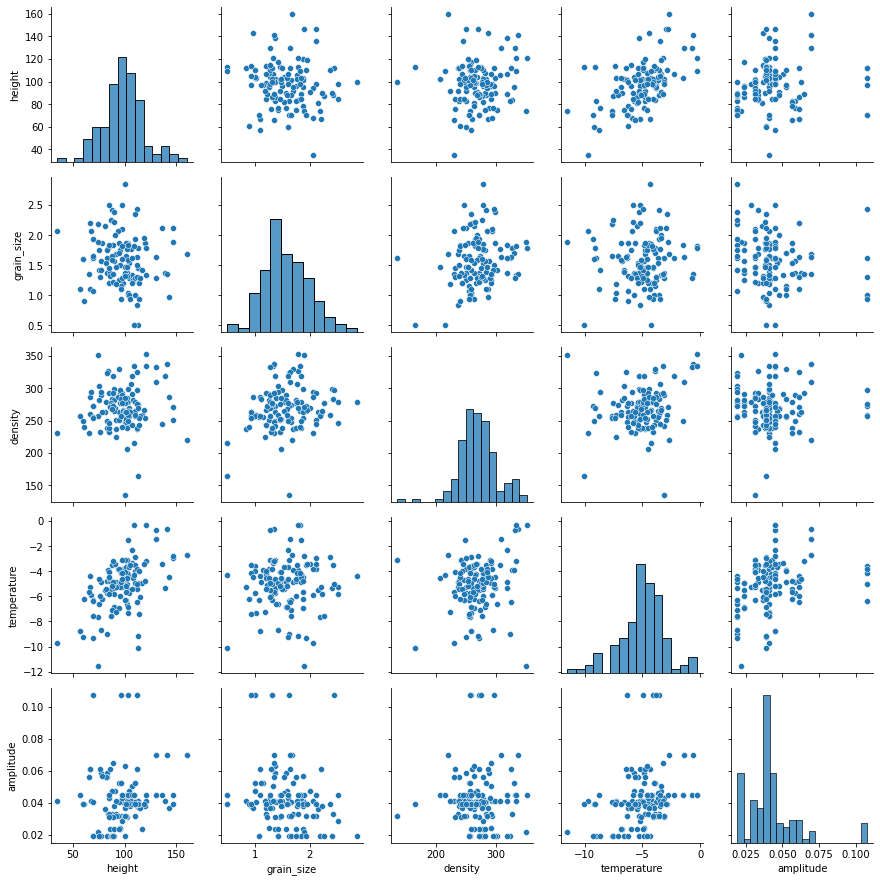

In [14]:
#calculate SWE 
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)


In [15]:
len(data)

125

In [16]:
outliers = data[data.y > 0.1]
outliers

,Unnamed: 0,X.x,pit_id,height,site_name,latitude,longitude,date,grain_size,density,temperature,b,zeta,X.y,y
39,40,40,COGM2S25_20200129,103,Grand Mesa,39.016246,-108.168366,2020-01-29,1.000000,258.283333,-3.591667,1.628193,15225.000000,89,0.107466
40,41,41,COGM2S27_20200204,70,Grand Mesa,39.017958,-108.167258,2020-02-04,1.625000,272.500000,-6.362500,1.858689,9469.841498,40,0.107466
72,74,74,COGM5S24_20200129,97,Grand Mesa,39.018263,-108.169071,2020-01-29,0.928571,257.222222,-4.127273,1.604118,16369.443740,106,0.107466
74,76,76,COGM5S31_20200130,112,Grand Mesa,39.019466,-108.164807,2020-01-30,1.305556,275.875000,-3.784615,1.783683,11730.308717,2,0.107466
85,87,87,COGM6S26_20200212,112,Grand Mesa,39.018401,-108.167333,2020-02-12,2.437500,296.833333,-4.992308,2.181871,6369.795045,46,0.107466


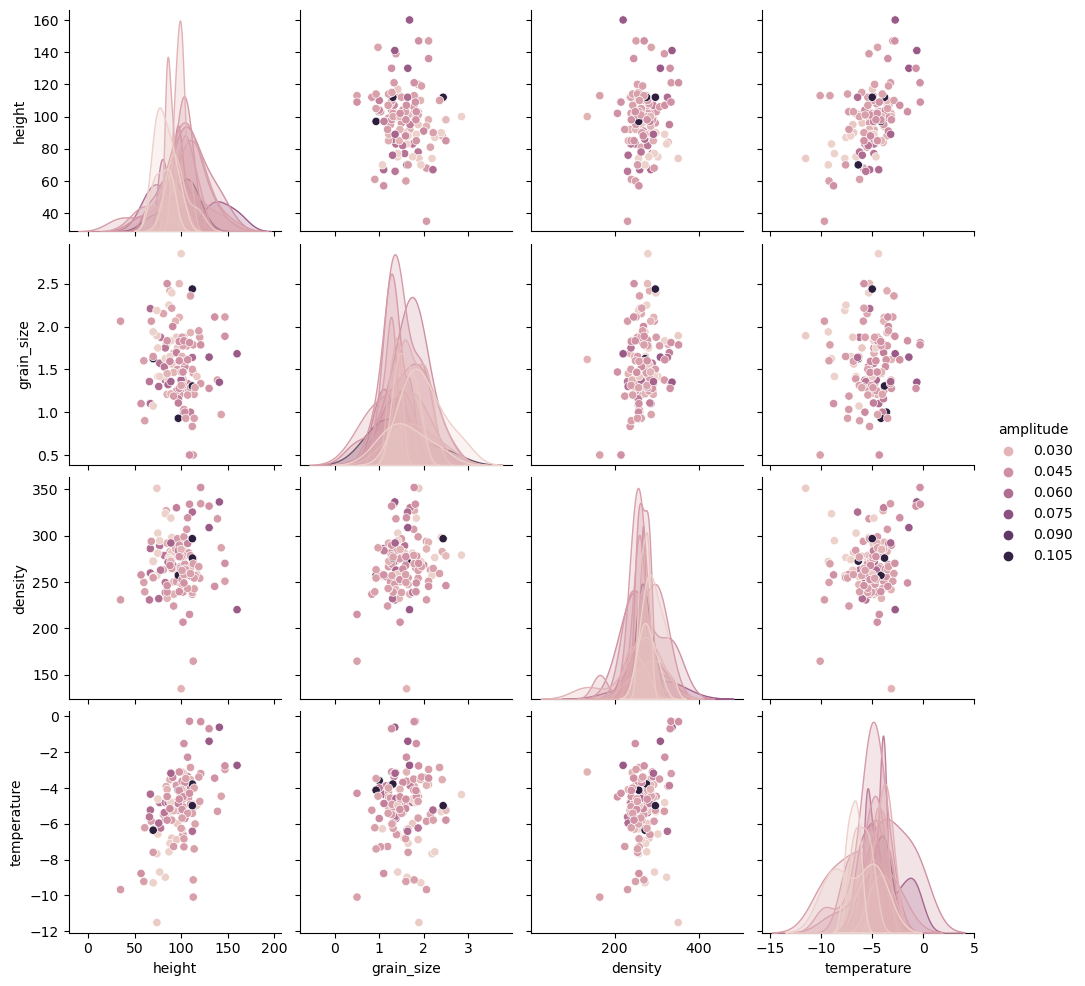

In [36]:
# pairplot with hue
sns.pairplot(df, hue ='amplitude')
plt.show()

## Comparing Polarizations

In [113]:
pits = data[['pit_id', 'height','grain_size', 'density', 'temperature', 'y']]
pits.columns = ['pit_id', 'height','grain_size', 'density', 'temperature', 'all_amplitude']




In [122]:
pits.head()

,pit_id,height,grain_size,density,temperature,all_amplitude,HH_amp,VV_amp,HV_amp,VH_amp
0,COGM1C1_20200131,83,1.375000,249.388889,-5.710000,0.058522,0.107583,0.107583,0.107583,0.107583
1,COGM1C1_20200208,77,1.571429,289.187500,-4.822222,0.058522,0.107583,0.107583,0.107583,0.107583
2,COGM1C14_20200131,81,2.150000,263.142857,-5.488889,0.036172,0.142749,0.142749,0.142749,0.142749
3,COGM1C5_20200212,75,1.416667,302.833333,-6.577778,0.019296,0.083195,0.083195,0.083195,0.083195
4,COGM1C7_20200131,96,1.750000,277.833333,-5.990909,0.023656,0.100066,0.100066,0.100066,0.100066


In [114]:
#reading in amplitudes for each polarization
HH = pd.read_csv('../Anuhya/amplitudes_HH.csv')
VV = pd.read_csv('../Anuhya/amplitudes_VV.csv')
VH = pd.read_csv('../Anuhya/amplitudes_VH.csv')
HV = pd.read_csv('../Anuhya/amplitudes_HV.csv')

In [115]:
#join in each polarization to the pits
#HH 
HH = HH[['0', '1']]
HH.columns = ['pit_id', 'HH_amp']
pits = pits.merge(HH, on=['pit_id'], how='left')


#VV
VV = VV[['0', '1']]
VV.columns = ['pit_id', 'VV_amp']
pits = pits.merge(VV, on=['pit_id'], how='left')


#HV
HV = HV[['0', '1']]
HV.columns = ['pit_id', 'HV_amp']
pits = pits.merge(HV, on=['pit_id'], how='left')


#VH
VH = VH[['0', '1']]
VH.columns = ['pit_id', 'VH_amp']
pits = pits.merge(VH, on=['pit_id'], how='left')

In [119]:
pits.columns

Index(['pit_id', 'height', 'grain_size', 'density', 'temperature',
       'all_amplitude', 'HH_amp', 'VV_amp', 'HV_amp', 'VH_amp'],
      dtype='object')

In [120]:
export = pits[['height', 'grain_size', 'density', 'temperature','HH_amp']]
export.to_csv('data_for_modeling.csv')

In [123]:
pits = pd.read_csv('final_data(2).csv')

In [125]:
pits.columns

Index(['Unnamed: 0', 'pit_id', 'HH', 'HV', 'VH', 'VV', 'height', 'grain_size',
       'density', 'temperature'],
      dtype='object')

In [126]:
pits = pits[['HH', 'HV', 'VH', 'VV', 'height', 'grain_size',
       'density', 'temperature']]

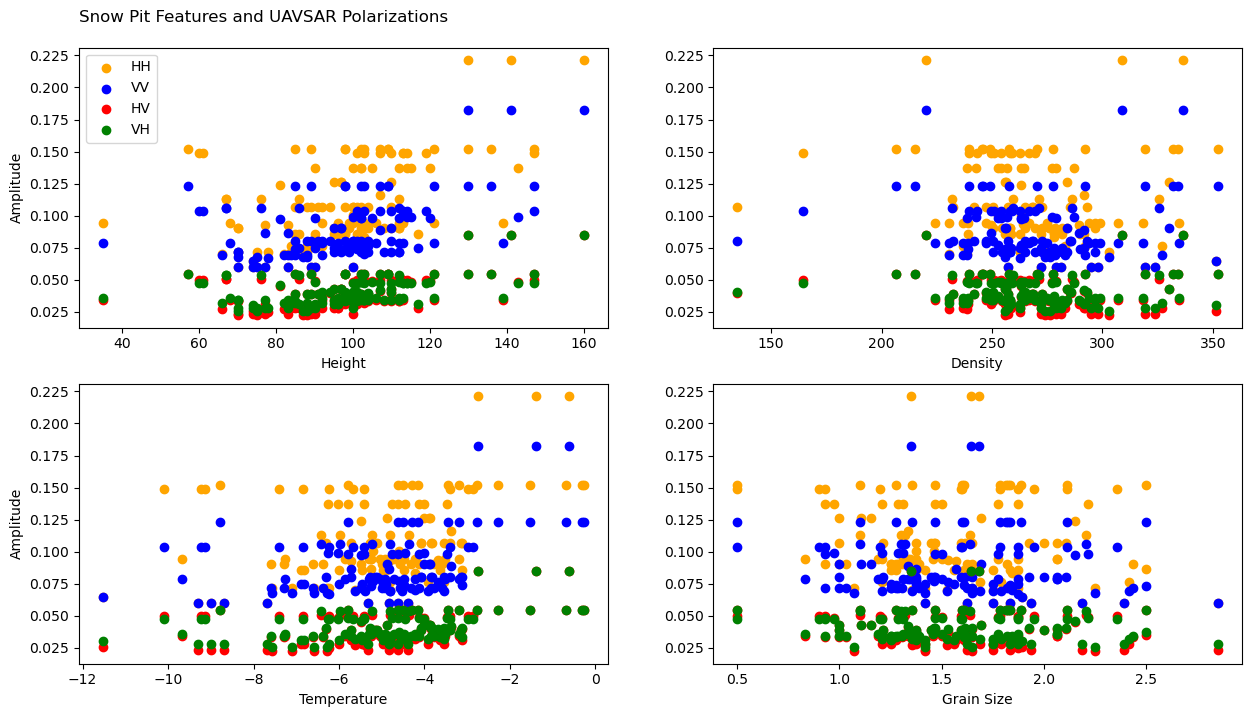

In [127]:
fig, axis = plt.subplots(2, 2)
fig.set_size_inches(15, 8)

#height
axis[0, 0].scatter(pits.height, pits.HH, color = 'orange', label = 'HH')
axis[0, 0].scatter(pits.height, pits.VV, color = 'blue', label = 'VV')
axis[0, 0].scatter(pits.height, pits.HV, color = 'red', label = 'HV')
axis[0, 0].scatter(pits.height, pits.VH, color = 'green', label = 'VH')
axis[0, 0].set_xlabel('Height')
axis[0, 0].set_ylabel('Amplitude')

#temperature
axis[1, 0].scatter(pits.temperature, pits.HH, color = 'orange', label = 'HH')
axis[1, 0].scatter(pits.temperature, pits.VV, color = 'blue', label = 'VV')
axis[1, 0].scatter(pits.temperature, pits.HV, color = 'red', label = 'HV')
axis[1, 0].scatter(pits.temperature, pits.VH, color = 'green', label = 'VH')
axis[1, 0].set_xlabel('Temperature')
axis[1, 0].set_ylabel('Amplitude')

#density
axis[0, 1].scatter(pits.density, pits.HH, color = 'orange', label = 'HH')
axis[0, 1].scatter(pits.density, pits.VV, color = 'blue', label = 'VV')
axis[0, 1].scatter(pits.density, pits.HV, color = 'red', label = 'HV')
axis[0, 1].scatter(pits.density, pits.VH, color = 'green', label = 'VH')
axis[0, 1].set_xlabel('Density')
#axis[0, 1].set_ylabel('Amplitude')

#grain_size
axis[1, 1].scatter(pits.grain_size, pits.HH, color = 'orange', label = 'HH')
axis[1, 1].scatter(pits.grain_size, pits.VV, color = 'blue', label = 'VV')
axis[1, 1].scatter(pits.grain_size, pits.HV, color = 'red', label = 'HV')
axis[1, 1].scatter(pits.grain_size, pits.VH, color = 'green', label = 'VH')
axis[1, 1].set_xlabel('Grain Size')
#axis[1, 1].set_ylabel('Amplitude')


axis[0, 0].set_title('Snow Pit Features and UAVSAR Polarizations\n', loc = 'left')
axis[0, 0].legend(loc = 'upper left')
plt.show()

In [128]:
pits

,HH,HV,VH,VV,height,grain_size,density,temperature
0,0.090272,0.033710,0.034575,0.071622,104.0,1.277778,269.318182,-5.476923
1,0.151810,0.054633,0.054984,0.123060,136.0,2.111111,245.307692,-3.453333
2,0.090272,0.033710,0.034575,0.071622,112.0,1.305556,275.875000,-3.784615
3,0.149241,0.049581,0.047769,0.103564,119.0,1.950000,266.569444,-3.392857
4,0.071491,0.022654,0.025515,0.068166,87.0,2.250000,276.428571,-7.570000
...,...,...,...,...,...,...,...,...
123,0.069852,0.027647,0.032221,0.069523,66.0,1.357143,230.666667,-5.622222
124,0.151810,0.054633,0.054984,0.123060,57.0,1.100000,257.700000,-8.780000
125,0.094391,0.034148,0.036019,0.078598,35.0,2.062500,230.750000,-9.680000
126,0.090272,0.033710,0.034575,0.071622,99.0,1.821429,264.944444,-4.309091


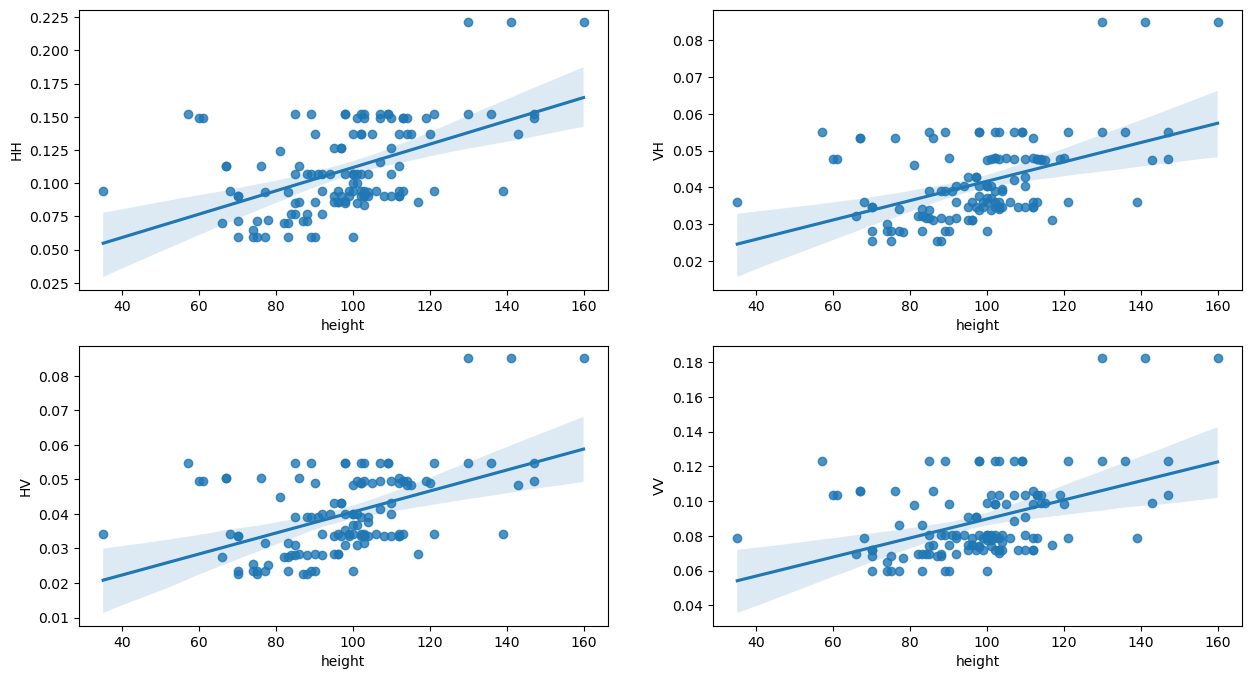

In [142]:
fig, axis = plt.subplots(2, 2)
fig.set_size_inches(15, 8)
sns.regplot(x="height", y="HH", data=pits, ax = axis[0][0]);
sns.regplot(x="height", y="HV", data=pits, ax = axis[1][0]);
sns.regplot(x="height", y="VV", data=pits, ax = axis[1][1]);
sns.regplot(x="height", y="VH", data=pits, ax = axis[0][1]);


In [147]:
pits.isna().sum()

HH             0
HV             0
VH             0
VV             0
height         3
grain_size     3
density        3
temperature    3
dtype: int64

In [156]:
pits = pits.drop(pits[pits.height.isna()].index)

In [167]:
from scipy import stats
HH_r = round(stats.pearsonr(pits['HH'], pits['height'])[0], 2)
HV_r = round(stats.pearsonr(pits['HV'], pits['height'])[0], 2)
VH_r = round(stats.pearsonr(pits['VH'], pits['height'])[0], 2)
VV_r = round(stats.pearsonr(pits['VV'], pits['height'])[0], 2)

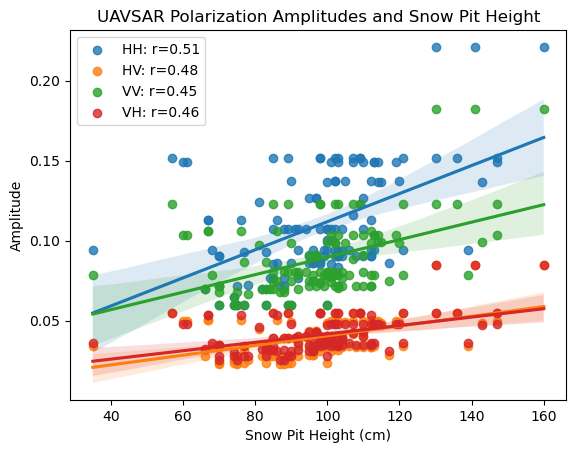

In [174]:
sns.regplot(x="height", y="HH", data=pits, label=f'HH: r={HH_r}')
sns.regplot(x="height", y="HV", data=pits, label=f'HV: r={HV_r}')
sns.regplot(x="height", y="VV", data=pits, label=f'VV: r={VV_r}')
sns.regplot(x="height", y="VH", data=pits, label=f'VH: r={VH_r}')

plt.xlabel('Snow Pit Height (cm)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('UAVSAR Polarization Amplitudes and Snow Pit Height')
plt.show()

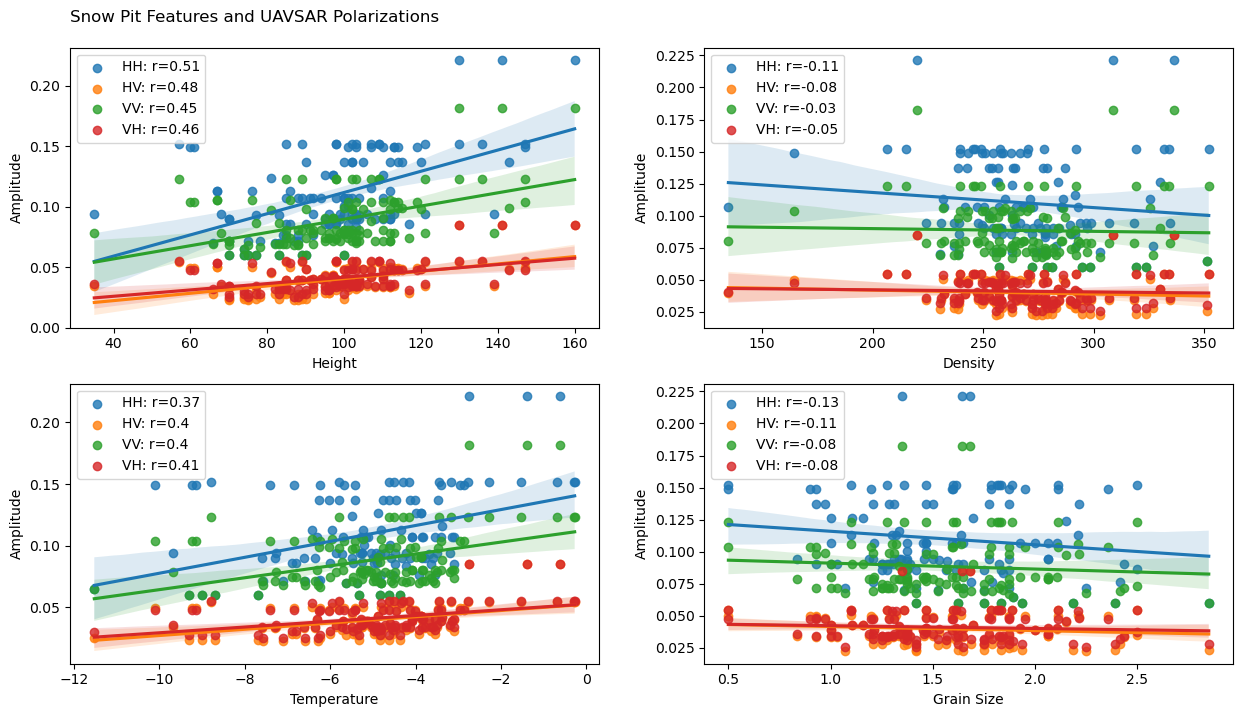

In [183]:
fig, axis = plt.subplots(2, 2)
fig.set_size_inches(15, 8)

#height
r = []
for i in ['HH', 'HV', 'VV', 'VH']:
    r.append(round(stats.pearsonr(pits[i], pits['height'])[0], 2))
sns.regplot(x="height", y="HH", data=pits, label=f'HH: r={r[0]}', ax = axis[0, 0])
sns.regplot(x="height", y="HV", data=pits, label=f'HV: r={r[1]}', ax = axis[0, 0])
sns.regplot(x="height", y="VV", data=pits, label=f'VV: r={r[2]}', ax = axis[0, 0])
sns.regplot(x="height", y="VH", data=pits, label=f'VH: r={r[3]}', ax = axis[0, 0])
axis[0, 0].set_xlabel('Height')
axis[0, 0].set_ylabel('Amplitude')
axis[0, 0].legend(loc = 'upper left')


#temperature
r = []
for i in ['HH', 'HV', 'VV', 'VH']:
    r.append(round(stats.pearsonr(pits[i], pits['temperature'])[0], 2))
sns.regplot(x="temperature", y="HH", data=pits, label=f'HH: r={r[0]}', ax = axis[1, 0])
sns.regplot(x="temperature", y="HV", data=pits, label=f'HV: r={r[1]}', ax = axis[1, 0])
sns.regplot(x="temperature", y="VV", data=pits, label=f'VV: r={r[2]}', ax = axis[1, 0])
sns.regplot(x="temperature", y="VH", data=pits, label=f'VH: r={r[3]}', ax = axis[1, 0])
axis[1, 0].set_xlabel('Temperature')
axis[1, 0].set_ylabel('Amplitude')
axis[1, 0].legend(loc = 'upper left')


#density
r = []
for i in ['HH', 'HV', 'VV', 'VH']:
    r.append(round(stats.pearsonr(pits[i], pits['density'])[0], 2))
sns.regplot(x="density", y="HH", data=pits, label=f'HH: r={r[0]}', ax = axis[0, 1])
sns.regplot(x="density", y="HV", data=pits, label=f'HV: r={r[1]}', ax = axis[0, 1])
sns.regplot(x="density", y="VV", data=pits, label=f'VV: r={r[2]}', ax = axis[0, 1])
sns.regplot(x="density", y="VH", data=pits, label=f'VH: r={r[3]}', ax = axis[0, 1])
axis[0, 1].set_xlabel('Density')
axis[0, 1].set_ylabel('Amplitude')
axis[0, 1].legend(loc = 'upper left')


#grain_size
r = []
for i in ['HH', 'HV', 'VV', 'VH']:
    r.append(round(stats.pearsonr(pits[i], pits['grain_size'])[0], 2))
sns.regplot(x="grain_size", y="HH", data=pits, label=f'HH: r={r[0]}', ax = axis[1, 1])
sns.regplot(x="grain_size", y="HV", data=pits, label=f'HV: r={r[1]}', ax = axis[1, 1])
sns.regplot(x="grain_size", y="VV", data=pits, label=f'VV: r={r[2]}', ax = axis[1, 1])
sns.regplot(x="grain_size", y="VH", data=pits, label=f'VH: r={r[3]}', ax = axis[1, 1])
axis[1, 1].set_xlabel('Grain Size')
axis[1, 1].set_ylabel('Amplitude')
axis[1, 1].legend(loc = 'upper left')



axis[0, 0].set_title('Snow Pit Features and UAVSAR Polarizations\n', loc = 'left')
plt.show()

In [ ]:
stats.pearsonr(pits[i], pits['grain_size'])[0]

# Plotting SWE

In [102]:
SWE = pd.read_csv('../Jonas/Pits_with_SWE_Height.csv')

In [103]:
SWE = SWE[['pit_id', 'SWEfin']]
SWE.columns = ['pit_id', 'SWE']
SWE.head()

,pit_id,SWE
0,COGM1N20_20200205,70.000000
1,COGM1N23_20200211,229.440868
2,COGM1S1_20200129,192.863339
3,COGM1S12_20200211,229.440868
4,COGM1S13_20200205,239.416558


In [186]:
pits = pd.read_csv('final_data(2).csv')

In [188]:
pits = pits[['pit_id', 'HH', 'HV', 'VH', 'VV', 'height', 'grain_size',
       'density', 'temperature']]
swe = pits.merge(SWE, on='pit_id', how = 'left')

In [190]:
swe.head()

,pit_id,HH,HV,VH,VV,height,grain_size,density,temperature,SWE
0,COGM2S37_20200201,0.090272,0.033710,0.034575,0.071622,104.0,1.277778,269.318182,-5.476923,NaN
1,COGMSO_20200321_1006,0.151810,0.054633,0.054984,0.123060,136.0,2.111111,245.307692,-3.453333,NaN
2,COGM5S31_20200130,0.090272,0.033710,0.034575,0.071622,112.0,1.305556,275.875000,-3.784615,279.0
3,COGMCO_20200318_0825,0.149241,0.049581,0.047769,0.103564,119.0,1.950000,266.569444,-3.392857,NaN
4,COGM2C2_20200131,0.071491,0.022654,0.025515,0.068166,87.0,2.250000,276.428571,-7.570000,NaN


In [192]:
len(swe)

128

In [191]:
swe.isna().sum()

pit_id          0
HH              0
HV              0
VH              0
VV              0
height          3
grain_size      3
density         3
temperature     3
SWE            77
dtype: int64

In [193]:
swe = swe.drop(swe[swe.height.isna()].index)
swe = swe.drop(swe[swe.SWE.isna()].index)

In [194]:
swe.head()

,pit_id,HH,HV,VH,VV,height,grain_size,density,temperature,SWE
2,COGM5S31_20200130,0.090272,0.033710,0.034575,0.071622,112.0,1.305556,275.875000,-3.784615,279.000000
9,COGM1N23_20200211,0.094391,0.034148,0.036019,0.078598,68.0,2.062500,293.928571,-5.862500,229.440868
15,COGM3N22_20200128,0.094391,0.034148,0.036019,0.078598,100.0,1.343750,247.500000,-4.716667,292.620238
17,COGM2N12_20200131,0.094391,0.034148,0.036019,0.078598,99.0,1.208333,266.516667,-4.227273,266.018398
19,COGM2S48_20200129,0.107128,0.039235,0.039120,0.080566,85.0,1.450000,232.375000,-4.090000,225.000000


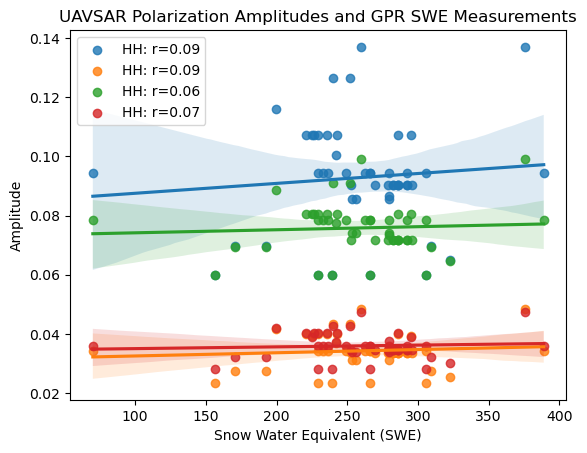

In [201]:
#compute correlations
r = []
for i in ['HH', 'HV', 'VV', 'VH']:
    r.append(round(stats.pearsonr(swe[i], swe['SWE'])[0], 2))
    
#plot varying polarizations
sns.regplot(x="SWE", y="HH", data=swe, label = f'HH: r={r[0]}');
sns.regplot(x="SWE", y="HV", data=swe, label = f'HH: r={r[1]}');
sns.regplot(x="SWE", y="VV", data=swe, label = f'HH: r={r[2]}');
sns.regplot(x="SWE", y="VH", data=swe, label = f'HH: r={r[3]}');

plt.xlabel('Snow Water Equivalent (SWE)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('UAVSAR Polarization Amplitudes and GPR SWE Measurements')
plt.show()